In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io

C:\Users\tedro\AppData\Local\Temp\ipykernel_39044\3191734447.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(img)


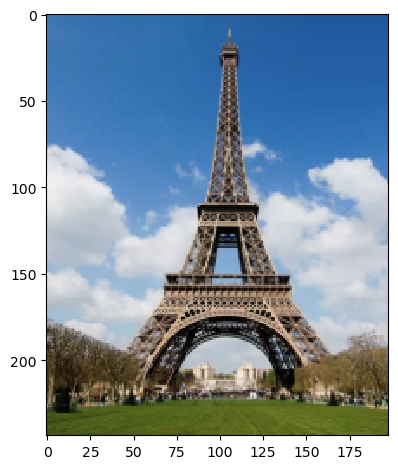

In [3]:
img = skimage.io.imread('image.png')
skimage.io.imshow(img)
plt.show()

In [4]:
img_norm = img/255.0
img_norm.shape

(244, 198, 3)

In [5]:
clusters = [2, 3, 6, 10]
starting_centroids = {
    2: np.array([(0, 0, 0), (0.1, 0.1, 0.1)]),
    3: np.array([(0, 0, 0), (0.1, 0.1, 0.1), (0.2, 0.2, 0.2)]),
    6: np.array([(0, 0, 0), (0.1, 0.1, 0.1), (0.2, 0.2, 0.2), (0.3, 0.3, 0.3), (0.4, 0.4, 0.4), (0.5, 0.5, 0.5)]),
    10: np.array([(0, 0, 0), (0.1, 0.1, 0.1), (0.2, 0.2, 0.2), (0.3, 0.3, 0.3), (0.4, 0.4, 0.4), (0.5, 0.5, 0.5), (0.6, 0.6, 0.6), (0.7, 0.7, 0.7), (0.8, 0.8, 0.8), (0.9, 0.9, 0.9)])
}
cluster_colors = np.array([
    [60, 179, 113],   
    [0, 191, 255],    
    [255, 255, 0],    
    [255, 0, 0],      
    [0, 0, 0],        
    [169, 169, 169],  
    [255, 140, 0],    
    [128, 0, 128],    
    [255, 192, 203],  
    [255, 255, 255]  
], dtype=np.uint8)

In [6]:
def k_means(k, img, max_iters = 50, tol=1e-5):
    H, W, C = img.shape

    # Flatten image to (N, 3)
    pixels = img.reshape(-1, 3)

    # Load required initial centroids
    centroids = starting_centroids[k]

    for iteration in range(max_iters):
        # this line performs broadcasting of all centroids to each pixels
        # this subtraction results in a diff np array that holds 
        # the difference of each pixel with each centroid in a list
        diffs = pixels[:, None, :] - centroids[None, :, :]

        # we then calculate the norm of differences for each pixels to change 
        # the (R,G,B) values to a single distance value
        dists = np.linalg.norm(diffs, axis=2)

        # next we create an array to store the cluster with minimum distance for each pixel
        labels = np.argmin(dists, axis=1)

        # new zero-filled centroid initialization with the shape same as centroids
        new_centroids = np.zeros_like(centroids)
        for i in range(k):
            # filtering with boolean array
            cluster_pixels = pixels[labels == i]
            if len(cluster_pixels) > 0:
                # calculate the new centroid by finding the mean
                new_centroids[i] = cluster_pixels.mean(axis=0)
            else:
                # If a cluster got empty, keep old centroid
                new_centroids[i] = centroids[i]

        # tol is the tolerance (stopping criterion) for determining convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            centroids = new_centroids
            break

        centroids = new_centroids

    # centroids[labels] is a reference that returns the centroid given a pixel index
    # using numpy integer indexing
    final_dists = np.linalg.norm(pixels - centroids[labels], axis=1)
    SSE = np.sum(final_dists ** 2)

    return centroids, labels.reshape(H, W), SSE

In [7]:
def recolor_image(labels, k):
    H, W = labels.shape
    out_img = np.zeros((H, W, 3), dtype=np.uint8)
    for i in range(k):
        # using boolean indexing to filter pixels with the same centroid
        out_img[labels == i] = cluster_colors[i]
    return out_img

#### Displaying the colored images for each K together with their SSE values:

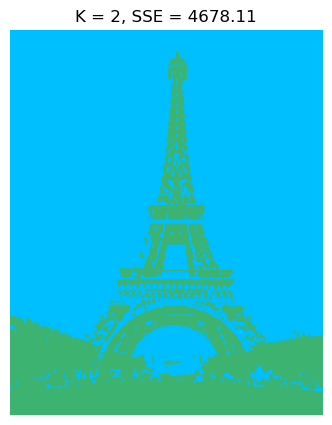

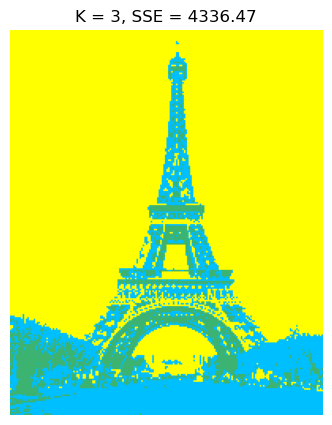

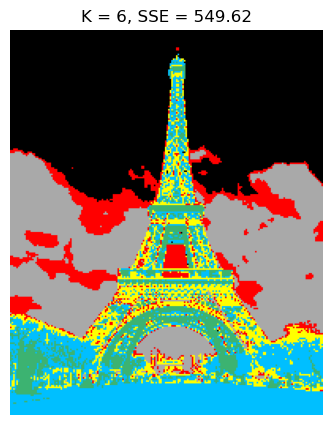

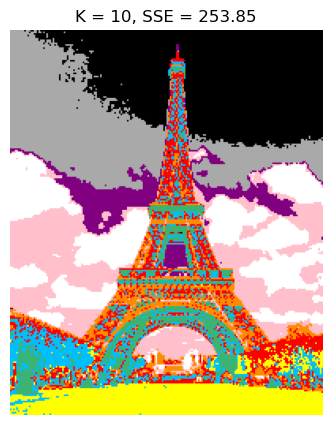

In [8]:
sse_vals = []
for k in clusters:
    centroids, labels, sse = k_means(k, img_norm)
    sse_vals.append(sse)
    colored = recolor_image(labels, k)
    
    plt.figure(figsize=(5, 5))
    plt.title(f"K = {k}, SSE = {sse:.2f}")
    plt.imshow(colored)
    plt.axis("off")
    plt.savefig(f"./kmeans_images/img-k{k}.png", dpi=300, bbox_inches='tight')
    plt.show()

#### Printing the SSE values for each K:

In [9]:
for i in range(len(clusters)):
    print(f"For K = {clusters[i]}, the caluculated SSE = {sse_vals[i]}")

For K = 2, the caluculated SSE = 4678.113042172468
For K = 3, the caluculated SSE = 4336.465222032642
For K = 6, the caluculated SSE = 549.6161192200376
For K = 10, the caluculated SSE = 253.84711145254835
